In [1]:
import numpy
%pylab inline
import matplotlib as mpl
mpl.rc("savefig", dpi=120)
import os
from scipy.interpolate import interp1d

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_profiles(U_record,t_grid,x_grid,nn = 10,save = 0):
    plt.xlabel('x'); plt.ylabel('concentration')
    tt = np.linspace(0+T/float(nn),T-T/float(nn),nn)
    plot(x_grid, U_record[0],'k.',label = 't = %.1f'% t_grid[0],lw = 2)
    color_idx = np.linspace(0,1,nn)
    for ij, t1 in enumerate(tt):
        plot(x_grid, U_record[int(t1/dt)],
             label = 't = %.2f'% t_grid[int(t1/dt)],
             color=plt.cm.jet(color_idx[ij]))

    plot(x_grid, U_record[-1],'k--',label = 't = %.1f'% t_grid[-1],lw = 2)
    #legend(framealpha = 0.8)
    margins(0.1)
    pth = os.path.join(os.path.expanduser('~'),'Desktop','diff_profile%s.png'%suffix)
    if save: plt.savefig(pth,bbox_inches = 'tight', dpi = 300)
    else: plt.show()
    return

def plot_fluxes(U_record,t_grid,save=0):
    U_r = np.array(U_record)
    try: 
        plot(t_grid,U_r[:,-1]**2*k_d,label = 'out')
    except:
        plot(t_grid,U_r[1]**2*k_d,label = 'out')
    #plot(t_grid,U_r[:,0]**2*k_u,label = 'input')
    legend(framealpha = 0.8)
    plt.margins(0.1)
    pth = os.path.join(os.path.expanduser('~'),'Desktop','diff_fluxes%s.png'%suffix)
    if save: plt.savefig(pth,bbox_inches = 'tight', dpi = 300)
    else: plt.show()
    return

In [3]:
def run(U,g_inc):
    '''explicit method'''
    ff = interp1d(g_inc[:,0],g_inc[:,1])
    g_inc = ff(t_grid)
    def f_vec(U,ti):
        upstream =  -D/(2.*k_u*dx) + \
        0.5*sqrt((D/(k_u*dx))**2 + 4*D*U[1]/(k_u*dx) + 4*g_inc[ti-1]/k_u)
        downstream = -D/(2.*k_d*dx) + \
        0.5*sqrt((D/(k_d*dx))**2 + 4*D*U[-2]/(k_d*dx))
        vivec = np.array([0. for ii in range(J)])
        vivec[0] = upstream; vivec[-1] = downstream
        return vivec

    def un(U,tt):
        U_new = np.zeros(len(U))
        U_new[0] = f_vec(U,tt)[0]
        U_new[-1] = f_vec(U,tt)[-1]
        for jj in range(1,J-1):
            U_new[jj] = (1-2*sigma)*U[jj] + sigma*U[jj+1] + sigma*U[jj-1]
        return U_new
    U_record = []
    U_record.append(U)
    for nn in range(1,N):
        a = un(U,nn)
        U = a
        U_record.append(U)
    return U_record

0.251701933807


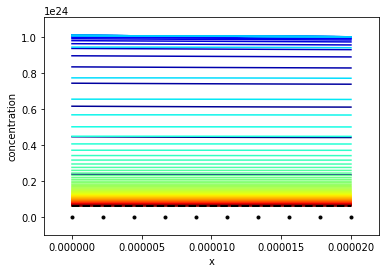

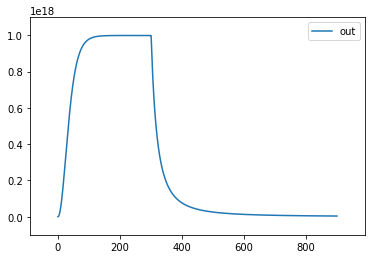

In [4]:
L = 20e-6 # Material length
J = 10 # Number of coordinate grid points
dx = float(L)/float(J-1) # Grid parameter
x_grid = numpy.array([j*dx for j in range(J)]) # Grid
T = 900; N = 1000000 
dt = float(T)/float(N-1) # Time step
t_grid = numpy.array([n*dt for n in range(N)]) # Time grid
T_membrane = 573.0
D=2.9e-7*exp(-0.23*1.6e-19/(1.38e-23*T_membrane)) # Diffusion coeffitient for U
sigma = float(D*dt)/float((2.*dx*dx))
print sigma
k_u = 1e-33; k_d = 1e-30
suffix = '_%.0e_s'%dt
U = np.array([0.0 for i in range(J)])
g_inc = np.array([[-1,0],[0,0],[0.01,1e18],[300,1e18],[301,0],[901,0]])

U_record = run(U,g_inc)
plot_profiles(U_record,t_grid,x_grid,nn = 100,save = 0)
plot_fluxes(U_record,t_grid,save=0)